In [3]:
#pip install yfinance

In [4]:
import yfinance as yf # to import data from yahoo of finance

In [5]:
# to download the data of bitcoin from 1st Jan 2020 to 21st Feb 2026 
btc = yf.download('BTC-USD',start='2020-01-01', end='2026-02-21') 
print(btc.head())

[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095


In [6]:
btc.isnull().sum() # to check if there is any null value in the data

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

In [7]:
btc.to_csv('btc.csv') # to save the data in csv file

In [8]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2243 entries, 2020-01-01 to 2026-02-20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   2243 non-null   float64
 1   (High, BTC-USD)    2243 non-null   float64
 2   (Low, BTC-USD)     2243 non-null   float64
 3   (Open, BTC-USD)    2243 non-null   float64
 4   (Volume, BTC-USD)  2243 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 105.1 KB


In [9]:
btc.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,2243.000000,2243.000000,2243.000000,2243.000000,2.243000e+03
mean,47993.708418,48901.922851,46970.227803,47968.389307,3.669965e+10
std,31541.128499,32021.738828,31026.472952,31550.223474,2.166714e+10
min,4970.788086,5331.833984,4106.980957,5002.578125,5.331173e+09
25%,22620.060547,23088.004883,22112.013672,22591.730469,2.235107e+10
50%,40869.554688,42048.304688,39712.746094,40828.175781,3.229276e+10
75%,66461.246094,67736.656250,65104.380859,66458.300781,4.572578e+10
max,124752.531250,126198.070312,123196.046875,124752.140625,3.509679e+11


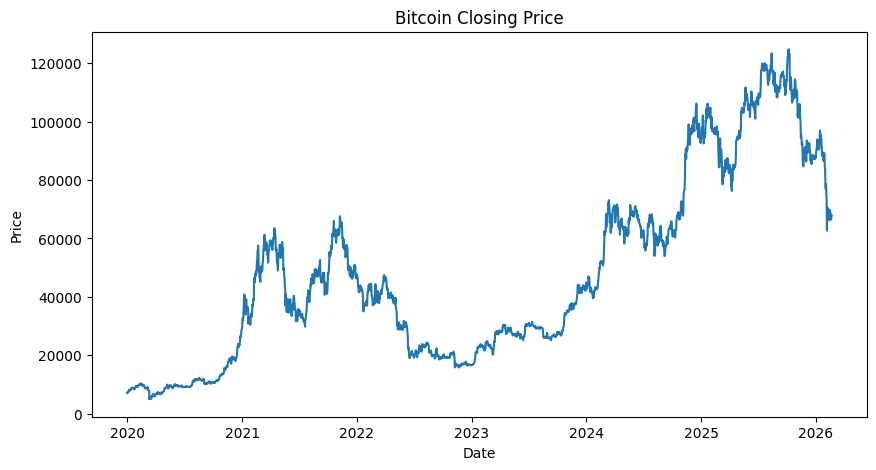

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(btc['Close'])
plt.title('Bitcoin Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


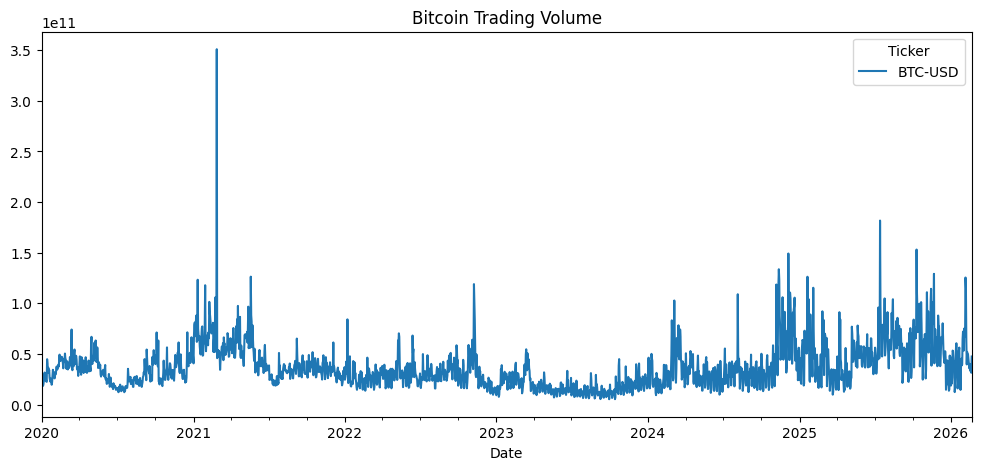

In [11]:
btc['Volume'].plot(figsize=(12,5))
plt.title("Bitcoin Trading Volume")
plt.show()

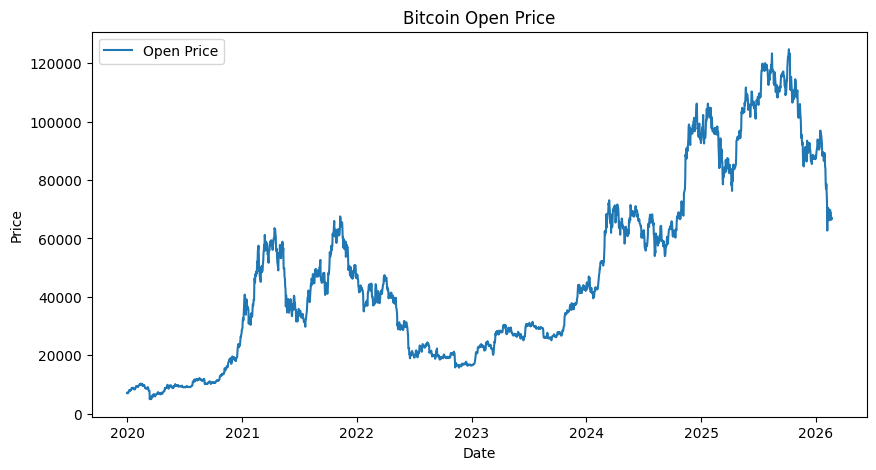

In [12]:
plt.figure(figsize=(10,5))
plt.plot(btc['Open'], label='Open Price')
plt.title('Bitcoin Open Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
btc['MA_7'] = btc['Close'].rolling(7).mean() #Calculate 7-day moving average

In [14]:
btc['Returns'] = btc['Close'].pct_change() # pct_change()=(Current Price - Previous Price)/Previous Price
btc.head()

Price,Close,High,Low,Open,Volume,MA_7,Returns
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
Date,,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,NaN,NaN
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,NaN,-0.029819
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,NaN,0.051452
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,NaN,0.008955
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,NaN,0.000089


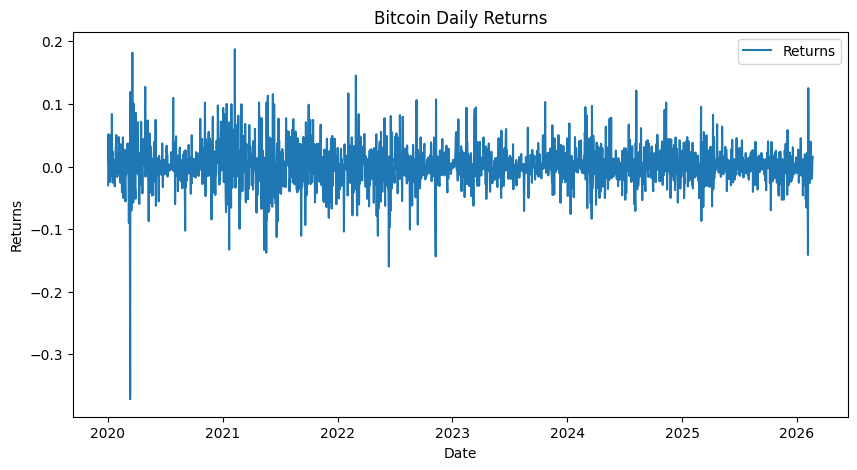

In [15]:
plt.figure(figsize=(10,5))
plt.plot(btc['Returns'], label='Returns')
plt.title('Bitcoin Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [16]:
btc['Volatility'] = btc['Returns'].rolling(30).std() #To check the fluctuation of last 30 days price using return by moving averages

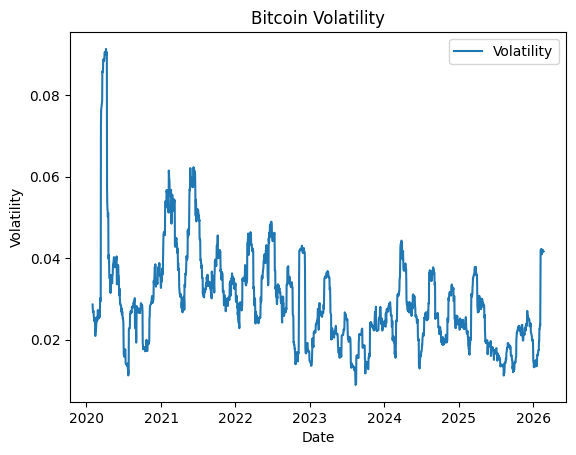

In [17]:
import matplotlib.pyplot as plt
plt.Figure(figsize=(10,5))
plt.plot(btc['Volatility'], label='Volatility')
plt.title('Bitcoin Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [18]:
btc = btc.dropna()

In [19]:
btc.head()

Price,Close,High,Low,Open,Volume,MA_7,Returns,Volatility
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,
Date,,,,,,,,
2020-01-31,9350.529297,9521.706055,9230.776367,9508.313477,29432489719,9058.462751,-0.016665,0.028623
2020-02-01,9392.875000,9439.323242,9313.239258,9346.357422,25922656496,9204.895229,0.004529,0.027682
2020-02-02,9344.365234,9468.797852,9217.824219,9389.820312,30835736946,9311.685965,-0.005165,0.026691
2020-02-03,9293.521484,9540.372070,9248.633789,9344.683594,30934096509,9366.500558,-0.005441,0.026810
2020-02-04,9180.962891,9331.265625,9112.811523,9292.841797,29893183716,9341.125279,-0.012112,0.027024


In [20]:
X=btc.drop(['Close'], axis=1) # to drop the close column from the data and assign it to X
y=btc['Close'] # to assign the close column to y

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 248968.30308724722
R^2 Score: 0.999752867046187


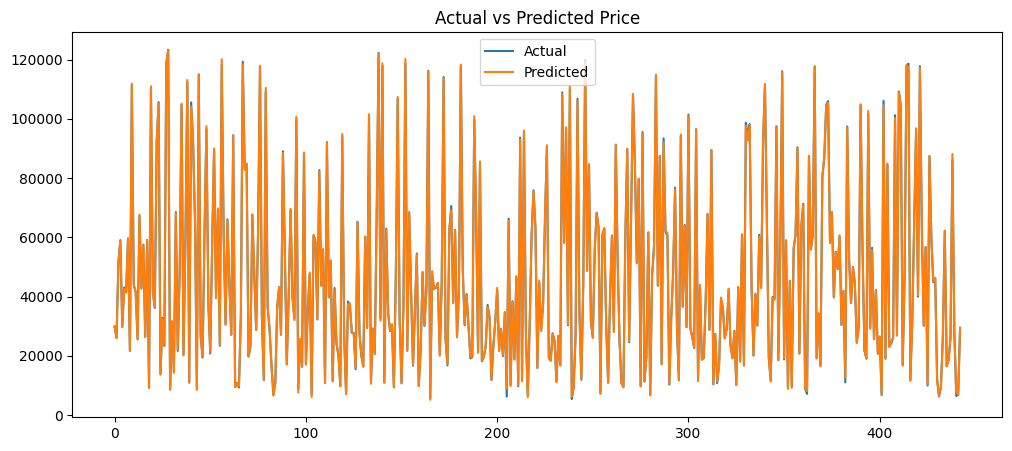

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Price")
plt.show()

In [24]:
!pip install statsmodels


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
btc.head()

Price,Close,High,Low,Open,Volume,MA_7,Returns,Volatility
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,
Date,,,,,,,,
2020-01-31,9350.529297,9521.706055,9230.776367,9508.313477,29432489719,9058.462751,-0.016665,0.028623
2020-02-01,9392.875000,9439.323242,9313.239258,9346.357422,25922656496,9204.895229,0.004529,0.027682
2020-02-02,9344.365234,9468.797852,9217.824219,9389.820312,30835736946,9311.685965,-0.005165,0.026691
2020-02-03,9293.521484,9540.372070,9248.633789,9344.683594,30934096509,9366.500558,-0.005441,0.026810
2020-02-04,9180.962891,9331.265625,9112.811523,9292.841797,29893183716,9341.125279,-0.012112,0.027024


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


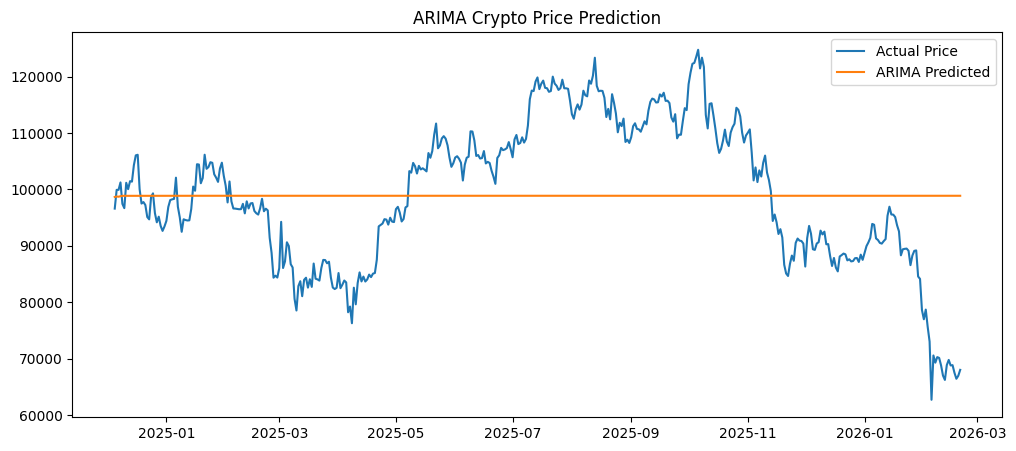

Mean Squared Error: 165557097.88724485
R2 Score: -0.0007497462264469679


In [ ]:
# ==============================
# 1. IMPORT LIBRARIES
# ==============================

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ==============================
# 2. TIME SERIES SELECT
# ==============================

series = btc['Close']

# ==============================
# 3. TRAIN TEST SPLIT (80-20)
# ==============================

train, test = train_test_split(series, test_size=0.2, shuffle=False)

# ==============================
# 4. ARIMA MODEL
# ==============================

model_arima = ARIMA(train, order=(5,1,0))
model_arima_fit = model_arima.fit()

# ==============================
# 5. PREDICTION
# ==============================

arima_pred = model_arima_fit.forecast(steps=len(test))

# ==============================
# 6. PLOT ACTUAL VS PREDICTED
# ==============================

plt.figure(figsize=(12,5))
plt.plot(test.index, test, label="Actual Price")
plt.plot(test.index, arima_pred, label="ARIMA Predicted")
plt.legend()
plt.title("ARIMA Crypto Price Prediction")
plt.show()

# ==============================
# 7. MODEL ACCURACY CHECK
# ==============================

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test, arima_pred)
r2 = r2_score(test, arima_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

In [27]:
# ======================
# LSTM MODEL
# ======================

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(series.values.reshape(-1,1))

# Create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)

# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle =False)


# Model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1],1)))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mse')

# Train
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict
lstm_pred = model_lstm.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)
y_test_actual = scaler.inverse_transform(y_test)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0070
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.0420e-04
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.5001e-04
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 4.2144e-04
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.1894e-04
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 3.9015e-04
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.8820e-04
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 3.9384e-04
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 3.4100e-04
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.1854e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step


In [28]:
from sklearn.metrics import mean_squared_error

# ARIMA MSE
arima_mse = mean_squared_error(test, arima_pred)

# LSTM MSE
lstm_mse = mean_squared_error(y_test_actual, lstm_pred)

print("ARIMA MSE:", arima_mse)
print("LSTM MSE:", lstm_mse)

ARIMA MSE: 165557097.88724485
LSTM MSE: 10426060.618675463
